Mean Squared Error: 1619099122.375551
R-squared: 0.9683135815704501
                Actual      Predicted
3988143  546142.571429  535599.783333
3955676  876660.595238  871320.839377
3006760  733314.866667  752869.264167
2464994  707714.142857  707714.142857
4335045  327666.583333  286307.881385


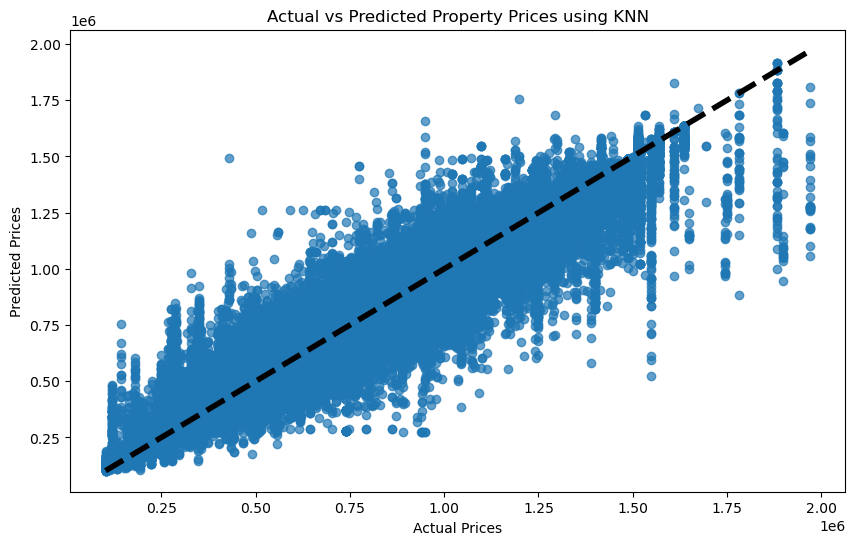

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load data
complaints_df = pd.read_csv('data/updated_complaints_data_interactions_clusters.csv')

# Define features and target
features = ['OFNS_DESC_Severity_Score', 'Hour', 'Hour_Severity_Interaction', 
            'Latitude', 'Longitude', 'Cluster']  # Add or modify features as needed
target = 'Average_Property_Price'

# Prepare the data
X = complaints_df[features]
y = complaints_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can experiment with the number of neighbors
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Optionally, you can also look at the prediction results alongside actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

# Save the results if needed
results.to_csv('knn_predictions.csv', index=False)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Property Prices using KNN')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Assuming your data is already loaded in X and y
# X = features, y = target variable

# Define the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Generate the learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=knn_model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Vary the training size
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error'  # Use mean squared error
)

# Calculate the mean and standard deviation for the training and validation scores
train_scores_mean = -train_scores.mean(axis=1)  # Convert negative scores to positive
train_scores_std = train_scores.std(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)  # Convert negative scores to positive
validation_scores_std = validation_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='r')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error', color='g')

# Plot the standard deviation as a transparent range
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, color='r', alpha=0.2)
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, 
                 validation_scores_mean + validation_scores_std, color='g', alpha=0.2)

# Labels and titles
plt.title('Learning Curve for K-Nearest Neighbors')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')

plt.show()
